In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the dataset from the file Ecommerce.csv

```
This dataset includes the following data for 200 online customers:

- Email
- Adress
- Avatar
- Avg Session Length (everage time they spent on usage)
- Time on App (time they spent using the application)
- Time on Website (time they spent using the website)
- Length of Membership (for how long they have been a user)
- Yearly Amount Spent (how much money they spend yearly)

Yout goal will be to estimate the value of the Yearly Amount Spent using the feature(s) of the users
```

In [2]:
dataset = pd.read_csv('Ecommerce.csv')

In [3]:
dataset.head()

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


### Get rid of non-numerical columns of the dataset

In [4]:
dataset.drop(['Email','Address','Avatar'],axis=1,inplace=True)
dataset.head()

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


### Use Yearly Amount Spent as your target variable. Plot the relationship of each of the numerical features with the target variable

/home/edgar/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


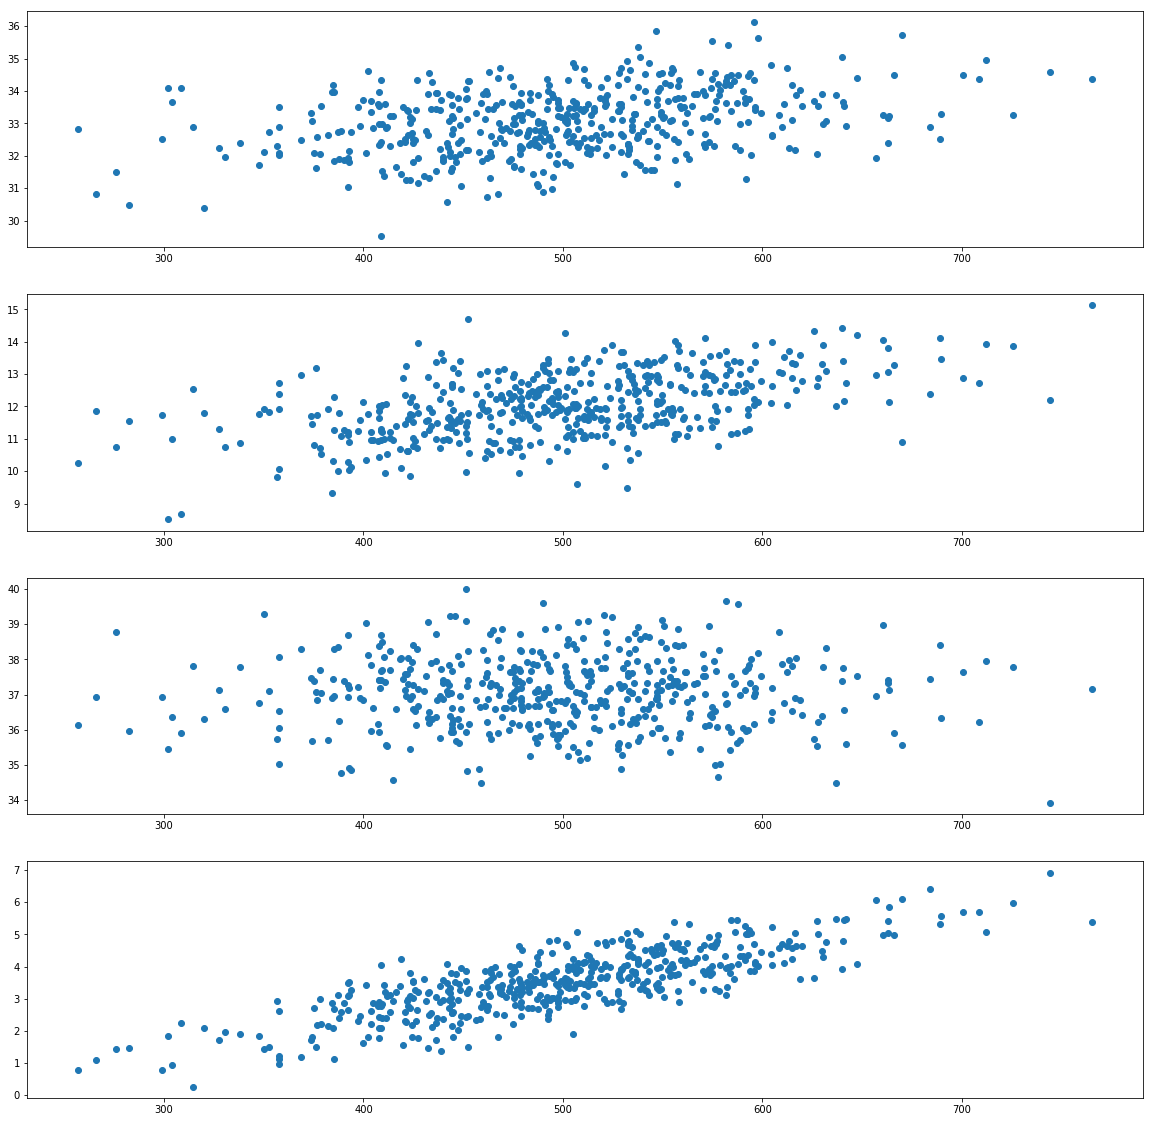

In [5]:
fig, axes = plt.subplots(4,figsize=(20,20))
axes[0].scatter(dataset['Yearly Amount Spent'],dataset['Avg Session Length'])
axes[1].scatter(dataset['Yearly Amount Spent'],dataset['Time on App'])
axes[2].scatter(dataset['Yearly Amount Spent'],dataset['Time on Website'])
axes[3].scatter(dataset['Yearly Amount Spent'],dataset['Length of Membership'])
fig.show()

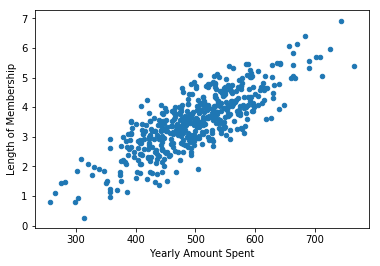

In [6]:
ax = dataset.plot.scatter(x='Yearly Amount Spent',y='Length of Membership')

### Leave only one feature that has a linear relationship with the target variable.

In [7]:
dataset['Length of Membership'].head()

0    4.082621
1    2.664034
2    4.104543
3    3.120179
4    4.446308
Name: Length of Membership, dtype: float64

### Divide the dataset into training and test sets with the ratio 80:20.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
xTrain, xTest, yTrain, yTest = train_test_split(dataset['Length of Membership'],dataset['Yearly Amount Spent'], test_size=0.2, random_state=42)

### Use the resulting train and test sets with the next 2 functions to fit linear regression and plot the resulting regression line.

The first function is `fit_1d_linear_regression` that takes two vectors $x$ and $y$, and returns a numpy array ($\beta_0, \beta_1)$, where $\beta_0$ is the intercept of the line, and $\beta_1$ is the slope. 

In [10]:
import numpy as np

In [19]:
def fit_1d_linear_regression(data_vector, response_vector):
    x = np.array(data_vector)
    y = np.array(response_vector)
    n = len(x)
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    
    Note: You can avoid the intercept for simplicity 
    or include the intercept for an extra point
    """
    a = x.transpose().dot(x)
    #a1 = np.linalg.inv(a)
    #print((a1.dot(x.transpose()).dot(y)))
    b1 = (np.sum(x*y) - (1/n)*np.sum(y)*np.sum(x))/(np.sum(x*x) - (1/n)*np.sum(x)*np.sum(x))
    b0 = (np.sum(y) - (b1 * np.sum(x)))/n
    #print(b0)
    #TODO
    
    return b0,b1


fit_1d_linear_regression(xTrain,yTrain)

(271.3521128033946, 64.64010065386668)

The second function is `plot_line` function, that takes $\beta_0, \beta_1, x, y$ and plots a scatter plot of the data, and the line $y = \beta_0 + \beta_1 x$. And saves the plot in `YOURNAME.png`

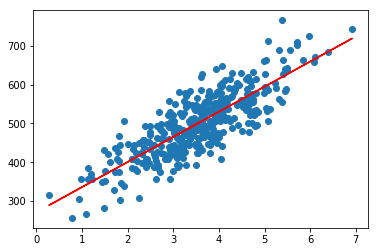

In [23]:
def plot_fitted_line(b:list,
                     x,
                     y,
                     username: str):
    """
    :param b0: Intersept of line to plot
    Note: avoid this if you don't have an intercept in the previous function
    :param b1: Slope of the line to plot
    :param x: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x coordinates)
    :param y: A pandas series object (i.e. a column of a dataframe),
                        where each element is a label (y coordinates)
    """
    
    plt.scatter(x,y)
    plt.plot(x,b[0]+ b[1]*x,color='r')
    plt.savefig(username + '.png')
    plt.show()
    
plot_fitted_line(b=fit_1d_linear_regression(xTrain,yTrain), x=xTrain, y=yTrain, username='Edgar')

### Plot example

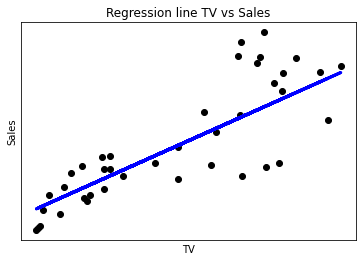

### Now fit the linear regression to the data containing only 1 feature using sklearn and compare the results with your own fit_1d_linear_regression function

In [24]:
from sklearn import linear_model

In [42]:
xTrain, xTest, yTrain, yTest = train_test_split(dataset['Length of Membership'],dataset['Yearly Amount Spent'], test_size=0.2, random_state=42)

In [63]:
regr = linear_model.LinearRegression()

# Train the model using the training data
regr.fit(xTrain.values.reshape(-1,1),yTrain)
regr.coef_ , regr.intercept_  # Nuyn tvernen stacvum

(array([64.64010065]), 271.3521128033932)

### Use sklearn.metrics to calculate Mean absolute error, Mean squared error, Root mean squared error and R-squared for the results of your own function vs the sklearn regression results. Try to interprete your results.

In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [75]:
y_pred = regr.predict(xTest.values.reshape(-1,1))
print("Mean absolute error:" , mean_absolute_error(yTest,y_pred))
print("Mean squared error:" , mean_squared_error(yTest,y_pred))
print("R squared:" , r2_score(yTest,y_pred))

Mean absolute error: 37.83623390033242
Mean squared error: 2162.1116327764244
R squared: 0.5633624502240147


### Fit linear regression to the data containing all numerical features using sklearn and use the same metrics to evaluate how good the model is.

In [79]:
from sklearn.model_selection import train_test_split

In [87]:
dataset['Length of Membership'].head()

0    4.082621
1    2.664034
2    4.104543
3    3.120179
4    4.446308
Name: Length of Membership, dtype: float64

In [100]:
xTrain, xTest, yTrain, yTest = train_test_split(dataset[dataset.columns.difference(['Yearly Amount Spent'])],dataset['Yearly Amount Spent'], test_size=0.2,random_state=42)

In [104]:
regr = linear_model.LinearRegression()
regr.fit(xTrain,yTrain)
y_pred = regr.predict(xTest)

In [109]:
print("Mean Absolute error" , mean_absolute_error(yTest,y_pred))
print("Mean square error" , mean_squared_error(yTest,y_pred))
print("r2 score" , r2_score(yTest,y_pred)) #0.56 er 1 future-i depqum depqum

Mean Absolute error 8.558441885315249
Mean square error 109.86374118394028
r2 score 0.9778130629184126
